In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_heart=pd.read_csv("heart.csv")
df_heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_heart.shape

(303, 14)

In [6]:
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
df_heart.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

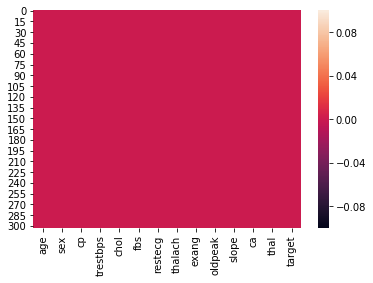

In [10]:
sns.heatmap(df_heart.isnull())

In [11]:
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


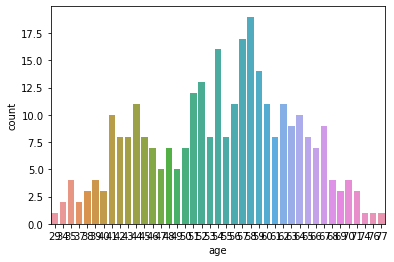

In [14]:
sns.countplot(x='age',data=df_heart)

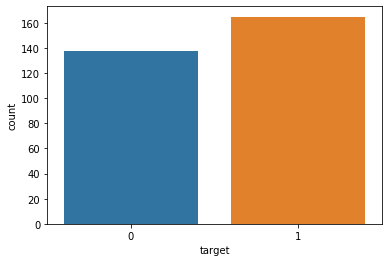

In [15]:
sns.countplot(x='target',data=df_heart)

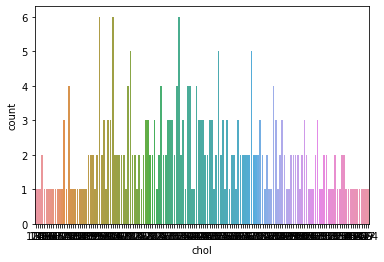

In [16]:
sns.countplot(x='chol',data=df_heart)

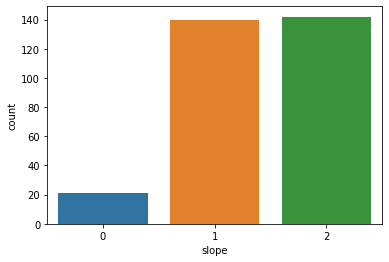

In [17]:
sns.countplot(x='slope',data=df_heart)

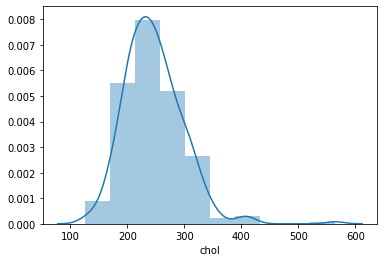

In [19]:
sns.distplot(df_heart['chol'],bins=10)

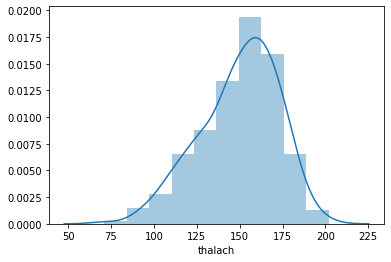

In [20]:
sns.distplot(df_heart['thalach'],bins=10)

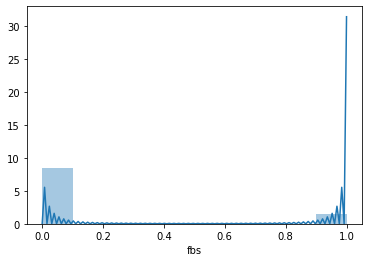

In [21]:
sns.distplot(df_heart['fbs'],bins=10)

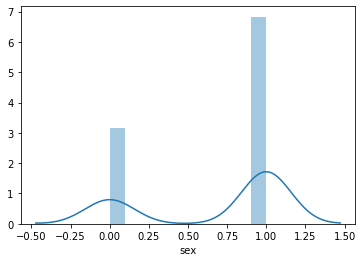

In [22]:
sns.distplot(df_heart['sex'],bins=10)

In [23]:
df_heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

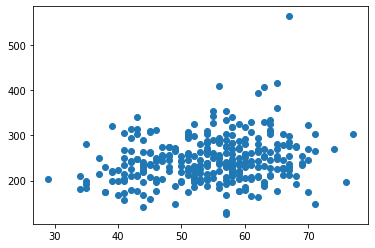

In [25]:
plt.scatter(df_heart['age'],df_heart['chol'])
plt.show()

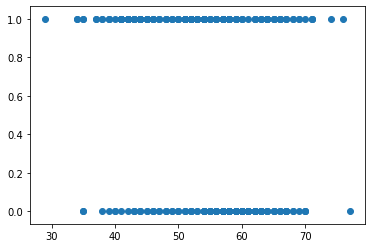

In [26]:
plt.scatter(df_heart['age'],df_heart['target'])
plt.show()

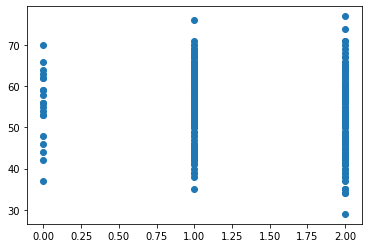

In [27]:
plt.scatter(df_heart['slope'],df_heart['age'])
plt.show()

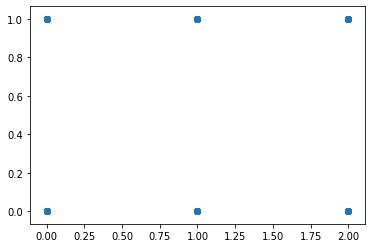

In [28]:
plt.scatter(df_heart['slope'],df_heart['exang'])
plt.show()

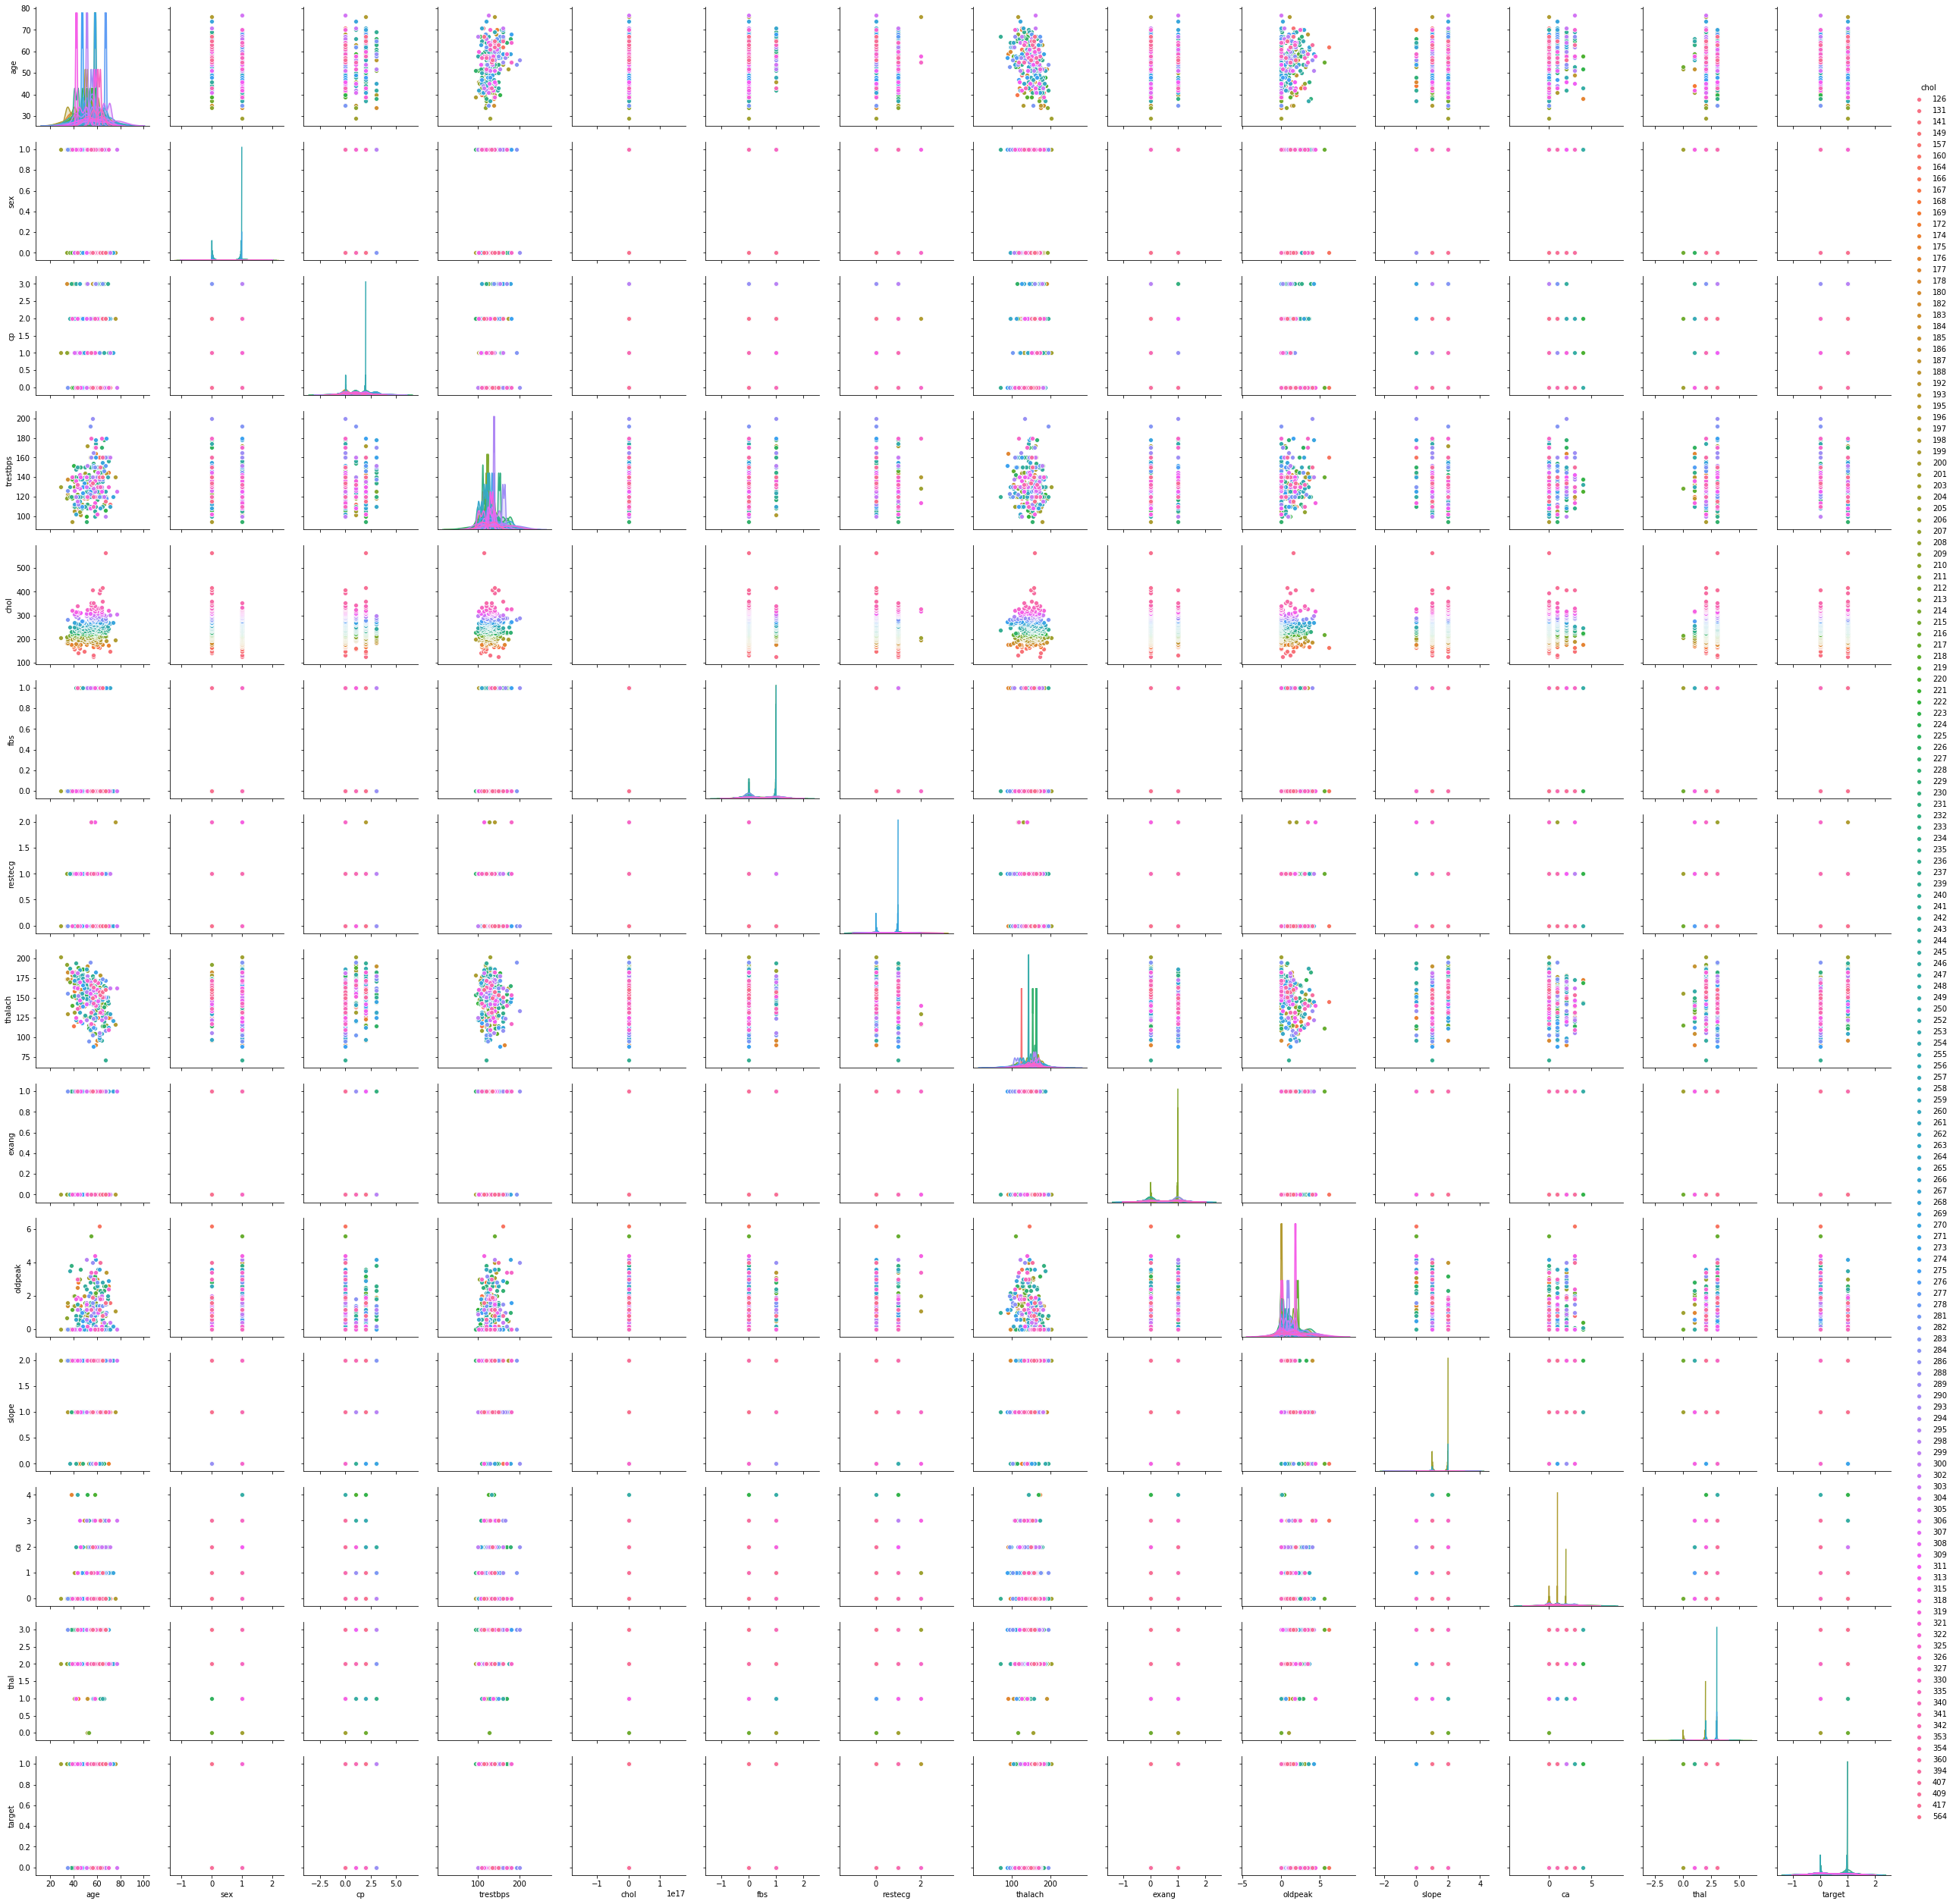

In [73]:
sns.pairplot(df_heart,hue='chol')

In [30]:
df_heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


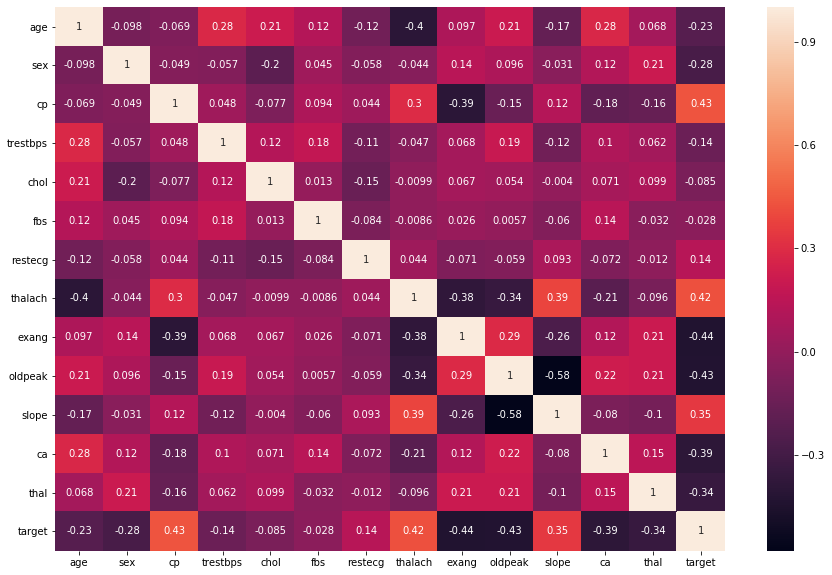

In [34]:
corr_hmap=df_heart.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [35]:
df_heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [36]:
df_heart.shape

(303, 14)

In [38]:
x=df_heart.iloc[:,:]
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
y=df_heart.iloc[:,-1]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.36,random_state=34)

In [45]:
x_train.shape

(193, 14)

In [46]:
y_train.shape

(193,)

In [47]:
x_test.shape

(110, 14)

In [48]:
y_test.shape

(110,)

In [49]:
lm=LinearRegression()

In [50]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lm.coef_

array([-1.79681072e-16, -1.01578633e-16, -1.49687693e-16,  1.25783441e-17,
        5.67146794e-18,  3.53098720e-16,  2.04772748e-16, -2.37503683e-17,
        8.93974270e-17,  3.82294921e-16,  3.52921506e-16,  1.16824922e-16,
       -6.24744036e-17,  1.00000000e+00])

In [52]:
lm.score(x_train,y_train)

1.0

In [53]:
lm.intercept_

9.325873406851315e-15

In [54]:
pred=lm.predict(x_test)
print('predicted result',pred)
print('actual price',y_test)

predicted result [ 1.00000000e+00  8.06095753e-16  2.04931141e-15 -3.43547296e-16
  1.00000000e+00  8.32745318e-16  2.17415380e-15 -1.43905999e-15
 -1.24564118e-16  1.00000000e+00  1.00000000e+00  1.00327571e-15
  7.92231053e-16  1.00000000e+00 -8.48527655e-16  1.00000000e+00
  1.00000000e+00  1.00000000e+00  9.04404096e-16  1.00000000e+00
 -9.99838379e-16  1.00000000e+00 -2.41076723e-15  4.35671384e-16
  1.00000000e+00  1.00000000e+00 -6.27836909e-16  1.37914251e-16
  1.00000000e+00  2.37184862e-15 -1.50588092e-15 -1.08948831e-15
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.73650243e-15
  1.00000000e+00 -1.53021525e-15  1.00000000e+00  1.00000000e+00
 -1.93444437e-15  1.00000000e+00  1.00000000e+00  1.00000000e+00
 -4.58117787e-16  1.00000000e+00 -4.82057659e-16  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  2.27642363e-15
  1.66827549e-15  1.00000000e+00 -1.58860157e-15  1.00000000e+00
  1.0000

In [55]:
print('error')

print('mean absolute error',mean_absolute_error(y_test,pred))


print('mean squared error',mean_squared_error(y_test,pred))


print('root mean absolute error',np.sqrt(mean_squared_error(y_test,pred)))




error
mean absolute error 1.1296768040104405e-15
mean squared error 1.8160931747204616e-30
root mean absolute error 1.3476250126502037e-15


In [57]:
from sklearn.linear_model import Lasso,Ridge

In [58]:
ls=Lasso()

In [59]:
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.14395317223204185


In [60]:
ls.predict(x_test)

array([0.76508866, 0.18204126, 0.16420004, 0.47222766, 0.63705265,
       0.64740678, 0.51534232, 0.57061374, 0.45777367, 0.72790578,
       0.71285643, 0.34353765, 0.39754318, 0.63237021, 0.57997862,
       0.39707787, 0.49434464, 0.66760388, 0.36412866, 0.68531506,
       0.31035391, 0.69024481, 0.40334492, 0.32127408, 0.80845064,
       0.39028687, 0.46984246, 0.19636521, 0.74694148, 0.37046712,
       0.62235134, 0.27728743, 0.65547645, 0.6020956 , 0.51630227,
       0.31227379, 0.64967471, 0.63491477, 0.59117542, 0.58559168,
       0.34518091, 0.67935396, 0.48758296, 0.66292144, 0.64849677,
       0.62632115, 0.43252954, 0.54852607, 0.56757455, 0.55125931,
       0.62845903, 0.39248338, 0.65873364, 0.43392548, 0.60373885,
       0.48271184, 0.52530256, 0.67014844, 0.564376  , 0.49175799,
       0.44803143, 0.62746977, 0.68928487, 0.47576148, 0.52728108,
       0.80702538, 0.55885089, 0.74111042, 0.62432985, 0.56574262,
       0.50587672, 0.59347267, 0.33734201, 0.58711766, 0.63007

In [61]:
ls.intercept_

-0.30273731659040104

In [62]:
r2_score(y_test,pred)

1.0

In [63]:
rd=Ridge()

In [64]:
rd.fit(x_train,y_train)
rpred=rd.predict(x_test)

In [65]:
rpred

array([ 9.89886703e-01,  1.05892052e-02, -5.76158081e-03,  2.16147032e-02,
        1.00212061e+00,  1.15505410e-02,  2.17982315e-02,  1.67561531e-02,
       -1.37745036e-03,  9.91448578e-01,  9.90282697e-01,  5.41214369e-04,
        6.09418127e-03,  9.96957245e-01,  1.08082732e-02,  9.77622302e-01,
        9.84064993e-01,  1.00611511e+00,  1.28220291e-03,  9.98021222e-01,
        6.85405314e-03,  9.96487841e-01,  1.16043538e-05,  7.87801663e-03,
        1.00324420e+00,  9.92318291e-01,  3.85466963e-03, -5.32527426e-03,
        9.82843802e-01,  3.62718019e-03,  2.89713060e-02,  3.72588539e-03,
        9.90030763e-01,  9.79340856e-01,  9.99900595e-01,  5.69518515e-03,
        9.87219237e-01,  1.19089199e-02,  9.96516247e-01,  1.00396813e+00,
        1.66370752e-03,  9.91988506e-01,  9.86021466e-01,  9.98918398e-01,
        1.88174266e-02,  9.95453877e-01, -3.31960067e-03,  1.00002905e+00,
        9.88635382e-01,  9.92255156e-01,  9.88886004e-01,  9.95520897e-01,
        9.78519253e-01,  

In [66]:
rd.score(x_train,y_train)

0.9992639113884371

In [67]:
r2_score(y_test,rpred)

0.9994480288323516

In [72]:
from sklearn.externals import joblib
joblib.dump(df_heart,"heart.csv")

['heart.csv']